In [1]:
!pip install pydotplus
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 977 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=52860f41d6811538392b8b990d45aaadd1cb9da532dfe4c614a1ca5f1a15cbea
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.feature_selection import RFE


In [3]:
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import files

uploaded = files.upload()

Saving bdpredicao.xlsx to bdpredicao.xlsx


In [5]:
df = pd.read_excel(next(iter(uploaded.keys())))
df

,id_cooperado,pf_ou_pj,especialidade,competencia,nacionalidade,situacao_epoca_do_repasse,hospital,estado_civil,grau_instrucao,cooperado_origem_de_conversao,cooperado_destino_de_conversao,participa_servico_especial,valor_procedimento_a_repassar,valor_lancamento_eventual_a_repassar,valor_predicao_liquido
0,1719,pf,Médico cirurgião geral,2021-01-01,Brasileiro(a),LICENCIADO,P ATENDIMENTO,Solteiro,Superior,0,0,0,0.0,0.0,0.0
1,1719,pf,Médico cirurgião geral,2021-02-01,Brasileiro(a),LICENCIADO,P ATENDIMENTO,Solteiro,Superior,0,0,0,0.0,0.0,0.0
2,1719,pf,Médico cirurgião geral,2021-03-01,Brasileiro(a),LICENCIADO,P ATENDIMENTO,Solteiro,Superior,0,0,0,0.0,0.0,0.0
3,1719,pf,Médico cirurgião geral,2021-04-01,Brasileiro(a),LICENCIADO,P ATENDIMENTO,Solteiro,Superior,0,0,0,0.0,0.0,0.0
4,1719,pf,Médico cirurgião geral,2021-05-01,Brasileiro(a),LICENCIADO,P ATENDIMENTO,Solteiro,Superior,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74479,24883,pf,Médico generalista,2022-02-01,Brasileiro(a),ATIVO,CONSULTORIOS,Casado,Superior,0,0,0,0.0,0.0,0.0
74480,24883,pf,Médico generalista,2022-03-01,Brasileiro(a),ATIVO,CONSULTORIOS,Casado,Superior,0,0,0,0.0,0.0,0.0
74481,24883,pf,Médico generalista,2022-04-01,Brasileiro(a),ATIVO,CONSULTORIOS,Casado,Superior,0,0,0,0.0,0.0,0.0
74482,24883,pf,Médico generalista,2022-05-01,Brasileiro(a),ATIVO,CONSULTORIOS,Casado,Superior,0,0,0,0.0,0.0,0.0


In [6]:


le = preprocessing.LabelEncoder()


In [7]:
df['pf_ou_pj'].isnull().sum()


0

In [8]:
df['competencia'].isnull().sum()

0

Registros sem nacionalidade foram setados com a moda 

In [9]:
df['nacionalidade'].fillna(('Brasileira'), inplace=True)

Como se tratam de dados sem especialidades, preferi criar um item que demonstra que não tem especialidade. Esses dados possuem valores de procedimentos e lançamentos eventuais que não podem ser ignorados. Também se trata de registros com definição difícil de fazer.

In [10]:
df['especialidade'].fillna(('Sem Especialidade'), inplace=True)


In [11]:
df['situacao_epoca_do_repasse'].isnull().sum()

0

In [12]:
df['hospital'].isnull().sum()

5436

Como se tratam de dados sem hospitais, 
preferi criar um item  que demonstra que não tem hospital. Esses dados possuem valores de procedimentos e 
lançamentos eventuais que não podem ser ignorados. Também se trata de registros com definição difícil de fazer.

In [13]:
df['hospital'].fillna(('Sem Hospital'), inplace=True)

Como se trata de dados sem estado civíl, 
preferi criar um estado civíl com descrição que demonstra que não tem informação por possuir alguns valores de procedimentos e 
lançamentos eventuais que não podem ser ignorados. Podemos descobrir algum conhecimento aqui no que se refere a ter mais tempo para atuar

In [14]:
df['estado_civil'].fillna(('Sem'), inplace=True)

Registros sem grau de instrução se referem a cadastros de empresas.
Será adotado um ítem pj nesse caso.

In [15]:

df['grau_instrucao'].fillna(('pj'), inplace=True)

Atributos categóricos que foram convertidos utilizando one hot encoding. 
Como não se tratam de features que tem sentido de ordenação,foi escolhido
o one hot encoding para que o modelo não interprete uma relação de ordem.
Podemos ter problemas com memória nesse caso mas inicialmente trabalharemos da forma ensinada 
na literatura.

In [16]:
def generate_labelencoder(atts):
  for attr in atts:
    df[attr] = le.fit_transform(df[attr])
  return df

In [17]:
df['vai_receber'] = np.where(df['competencia']=='2022-06-01',2, 
         (np.where(df['valor_predicao_liquido'] > 0.0000000001, 1, 0)))

Features categóricas com domínio binário ou com sentido de ordenação. Convertidas utilizando o Label Encoder

In [18]:

df  = generate_labelencoder(['pf_ou_pj','grau_instrucao','competencia','hospital','especialidade','estado_civil','nacionalidade','situacao_epoca_do_repasse'])

In [19]:
df = df.drop(['id_cooperado'], axis=1)

In [20]:
df_classificador = df

In [21]:
df_classificador['valor_total'] = df_classificador['valor_procedimento_a_repassar']+df_classificador['valor_lancamento_eventual_a_repassar']

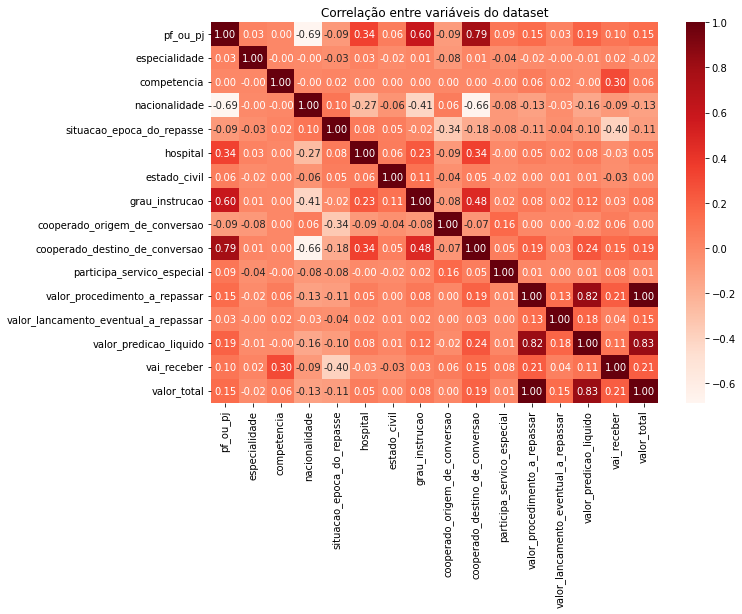

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_classificador.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Reds')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
# Carregando dataset
X = df_classificador[['pf_ou_pj','especialidade','competencia','nacionalidade','situacao_epoca_do_repasse','hospital','estado_civil','grau_instrucao','cooperado_origem_de_conversao','cooperado_destino_de_conversao','participa_servico_especial','valor_total']]
y = df_classificador[['vai_receber']]
# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)
# Mostrando importância de cada feature


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier()

Text(0.5, 1.0, 'Importância de cada feature')

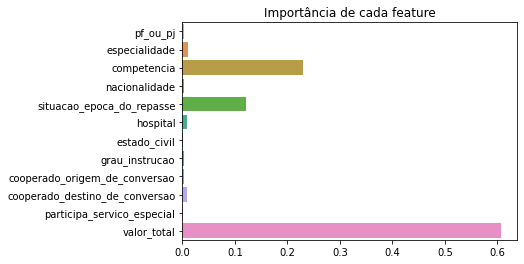

In [24]:
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [25]:
df_classificador = df_classificador.drop(['valor_lancamento_eventual_a_repassar'], axis=1)
df_classificador = df_classificador.drop(['pf_ou_pj'], axis=1)
df_classificador = df_classificador.drop(['valor_procedimento_a_repassar'], axis=1)
df_classificador = df_classificador.drop(['especialidade'], axis=1)
df_classificador = df_classificador.drop(['nacionalidade'], axis=1)
df_classificador = df_classificador.drop(['hospital'], axis=1)
df_classificador = df_classificador.drop(['estado_civil'], axis=1)
df_classificador = df_classificador.drop(['grau_instrucao'], axis=1)
df_classificador = df_classificador.drop(['cooperado_origem_de_conversao'], axis=1)
df_classificador = df_classificador.drop(['cooperado_destino_de_conversao'], axis=1)
df_classificador = df_classificador.drop(['participa_servico_especial'], axis=1)

In [26]:
df_competencia_junho_2022 = df_classificador[df_classificador["vai_receber"]==2]

In [27]:
df_classificador = df_classificador.drop(df_classificador.loc[df_classificador['vai_receber']==2].index)

In [28]:
X = df_classificador.loc[:, df_classificador.columns != 'valor_predicao_liquido']
X = X.loc[:, X.columns != 'vai_receber']
X = X.query("competencia!='2022-06-01'")
Y = df_classificador.query("competencia!='2022-06-01'")
Y = Y.loc[:, Y.columns == 'vai_receber']


In [29]:
X_predict = df_competencia_junho_2022.loc[:, df_classificador.columns != 'valor_predicao_liquido']
X_predict = X_predict.loc[:, X_predict.columns != 'vai_receber']



In [30]:
X_predict

,competencia,situacao_epoca_do_repasse,valor_total
17,17,6,9258.30
35,17,0,1899.44
53,17,6,0.00
71,17,5,0.00
89,17,5,35.28
...,...,...,...
74411,17,0,2500.00
74429,17,0,13956.16
74447,17,0,1875.00
74465,17,0,7123.21


In [31]:
################################################
X_Resto = X.loc[:, X.columns != 'valor_total']
X_Total = X.loc[:, X.columns == 'valor_total']

np.seterr(divide = 'ignore')



# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_Total['valor_total'] = min_max_scaler.fit_transform(X_Total)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_Resto[['competencia','situacao_epoca_do_repasse']] = min_max_scaler.fit_transform(X_Resto)




#Y = min_max_scaler.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [32]:
################################################
X_Resto_predict = X_predict.loc[:, X_predict.columns != 'valor_total']
X_Total_predict = X_predict.loc[:, X_predict.columns == 'valor_total']

np.seterr(divide = 'ignore')



# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_Total_predict['valor_total'] = min_max_scaler.fit_transform(X_Total_predict)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_Resto_predict[['competencia','situacao_epoca_do_repasse']] = min_max_scaler.fit_transform(X_Resto_predict)




#Y = min_max_scaler.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [33]:
#X = np.concatenate((resto, valor_total), axis=1)

In [34]:
X = X_Resto.join(X_Total)

In [35]:
X_predict = X_Resto_predict.join(X_Total_predict)

In [36]:
x_train, x_test, y_train, y_test = train_test_split( X, Y.vai_receber, test_size=0.2)

In [37]:

tree_recebe_nao_recebe = DecisionTreeClassifier(random_state=0, criterion='entropy',min_samples_split =100,max_depth=10) 
tree_recebe_nao_recebe = tree_recebe_nao_recebe.fit(x_train, y_train)
print("Acurácia (base de treinamento):", tree_recebe_nao_recebe.score(x_train, y_train))

Acurácia (base de treinamento): 0.9874191484824792


In [38]:
y_pred = tree_recebe_nao_recebe.predict(x_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['NAO','SIM']))


Acurácia de previsão: 0.9874911158493248
              precision    recall  f1-score   support

         NAO       0.98      1.00      0.99     10847
         SIM       1.00      0.95      0.97      3223

    accuracy                           0.99     14070
   macro avg       0.99      0.97      0.98     14070
weighted avg       0.99      0.99      0.99     14070



In [39]:
y_predict = tree_recebe_nao_recebe.predict(X_predict)


In [40]:
X_predict['vai_receber'] =y_predict

In [41]:
print("Número de erros de classificação {0} de {1}"
      .format((y_test != y_pred).sum(), y_pred.shape))

Número de erros de classificação 176 de (14070,)


In [42]:
x_train_test = X.join(Y)

In [43]:
df_apos_classificacao=pd.concat([X_predict,x_train_test])

In [44]:
df['vai_receber']=df_apos_classificacao['vai_receber']

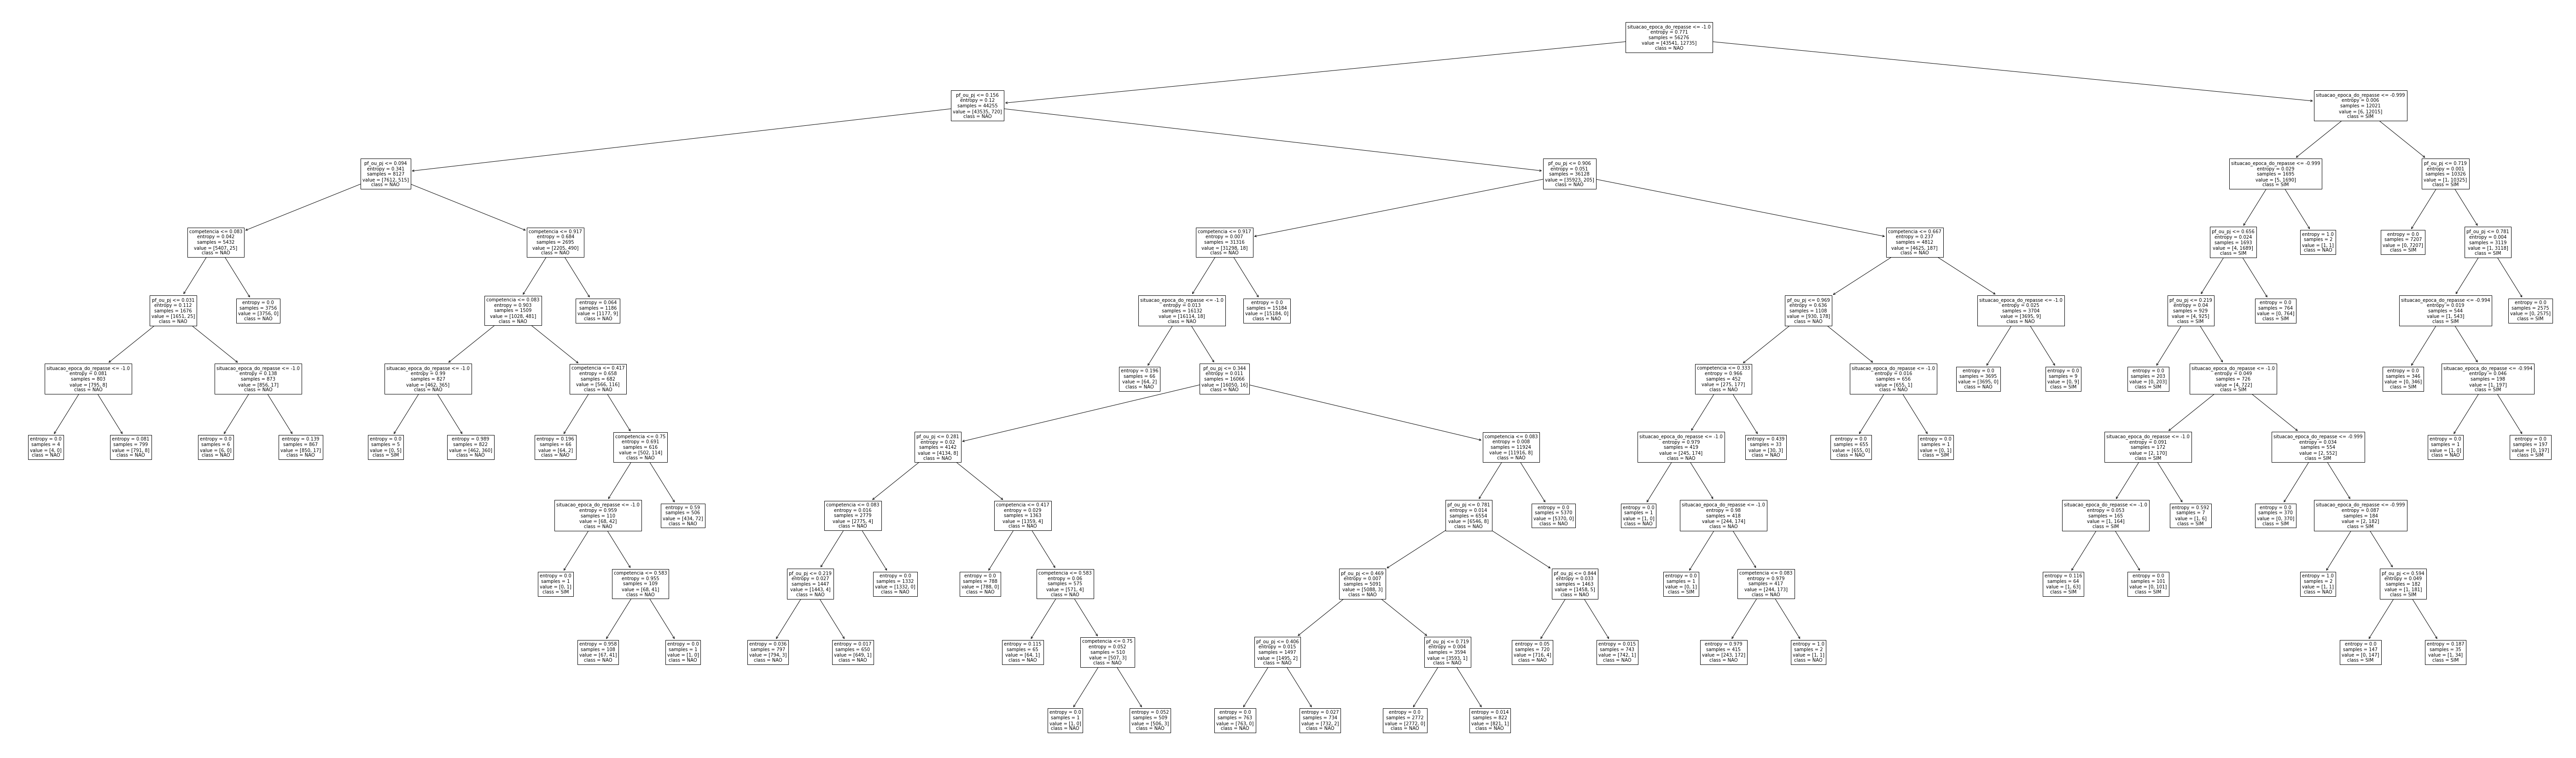

In [45]:
plt.figure(figsize=(100,30))  # set plot size (denoted in inches)
tree.plot_tree(tree_recebe_nao_recebe, fontsize=10,class_names=['NAO','SIM'],feature_names=['pf_ou_pj','competencia','situacao_epoca_do_repasse','vai_receber	valor_total'])
plt.savefig('tree_high_dpi', dpi=100)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

In [47]:
import itertools
import warnings
warnings.filterwarnings('ignore')

In [48]:
%%time

params = {'min_samples_split': [20,30,40,50,100,200],
          'max_depth': [10,15,20,30,40,50],
          'criterion': ['gini','entropy']
         }
decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=params, n_jobs=-1, cv=5, verbose=5)
decision_tree.fit(x_train,y_train)

print('Train R^2 Score : %.3f'%decision_tree.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%decision_tree.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%decision_tree.best_score_)
print('Best Parameters : ',decision_tree.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Train R^2 Score : 0.987
Test R^2 Score : 0.988
Best R^2 Score Through Grid Search : 0.988
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 200}
CPU times: user 1.64 s, sys: 429 ms, total: 2.07 s
Wall time: 11.6 s


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [50]:
df_regressao = df

In [51]:
del df_regressao['valor_lancamento_eventual_a_repassar']
del df_regressao['valor_procedimento_a_repassar']

In [138]:
X_feature_selection = df_regressao.query("competencia!=17 and vai_receber==1")
X_feature_selection = X_feature_selection.loc[:, X_feature_selection.columns != 'valor_predicao_liquido']

Y_feature_selection = df_regressao.query("competencia!=17 and vai_receber==1")
Y_feature_selection = Y_feature_selection.loc[:, Y_feature_selection.columns == 'valor_predicao_liquido']

In [139]:
del X_feature_selection['vai_receber']

In [140]:
x_train, x_test, y_train, y_test = train_test_split( X_feature_selection, Y_feature_selection, test_size=0.2)

In [142]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.feature_selection import RFE

ort train_test_split
modelo = rf()
lista=np.arange(1,12)
melhor_score=0
nf=0           
lista_score =[]
for i in range(len(lista)):

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_feature_selection, Y_feature_selection, test_size = 0.2, random_state = 0)

    modelo = rf()
    rfe = RFE(modelo,n_features_to_select=lista[i])
    X_treino_rfe = rfe.fit_transform(X_treino,Y_treino)
    X_teste_rfe = rfe.transform(X_teste)
    modelo.fit(X_treino_rfe,Y_treino)
    score = modelo.score(X_teste_rfe,Y_teste)
    lista_score.append(score)
    if(score > melhor_score):
        melhor_score = score
        nf = lista[i]
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

Numero ideal de features: 6
Score com 6 features: 0.996023


In [145]:

colunas = list(X_feature_selection.columns)

model = rf()

rfe = RFE(modelo, n_features_to_select=nf)             

Previsores_rfe = rfe.fit_transform(X_feature_selection,Y_feature_selection)  

modelo.fit(X_feature_selection,Y_feature_selection)         

temp = pd.Series(rfe.support_,index=colunas)

features_selecionadas_rfe = temp[temp==True].index
print(features_selecionadas_rfe)


Index(['pf_ou_pj', 'especialidade', 'competencia', 'hospital',
       'grau_instrucao', 'valor_total'],
      dtype='object')


In [146]:
X_regressao = df_regressao.query("competencia!=17 and vai_receber==1")
X_regressao = X_regressao.loc[:, X_regressao.columns != 'valor_predicao_liquido']

Y_regressao = df_regressao.query("competencia!=17 and vai_receber==1")
Y_regressao = Y_regressao.loc[:, Y_regressao.columns == 'valor_predicao_liquido']

In [147]:
X_regressao = X_regressao[['pf_ou_pj', 'especialidade', 'competencia', 'hospital',
       'grau_instrucao', 'valor_total']]

In [148]:
X_predicao_da_regressao = df_regressao.query("competencia==17 and vai_receber==1")
X_predicao_da_regressao = X_predicao_da_regressao.loc[:, X_predicao_da_regressao.columns != 'valor_predicao_liquido']


In [149]:
X_predicao_da_regressao = X_predicao_da_regressao[['pf_ou_pj', 'especialidade', 'competencia', 'hospital',
       'grau_instrucao', 'valor_total']]

In [150]:

X_Resto = X_regressao.loc[:, X_regressao.columns != 'valor_total']
X_Total = X_regressao.loc[:, X_regressao.columns == 'valor_total']

np.seterr(divide = 'ignore')



# Normalização Min-Max dos dados.


min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
valor_total = min_max_scaler.fit_transform(X_Total)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
resto = min_max_scaler.fit_transform(X_Resto)




#Y = min_max_scaler.fit_transform(Y)

In [151]:

X_Resto_predicao_regressao = X_predicao_da_regressao.loc[:, X_predicao_da_regressao.columns != 'valor_total']
X_Total_predicao_regressao = X_predicao_da_regressao.loc[:, X_predicao_da_regressao.columns == 'valor_total']

np.seterr(divide = 'ignore')


min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
valor_total_predicao_regressao = min_max_scaler.fit_transform(X_Total_predicao_regressao)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
resto_predicao_regressao = min_max_scaler.fit_transform(X_Resto_predicao_regressao)



In [152]:
X = np.concatenate((resto, valor_total), axis=1)

In [153]:
X_predicao_regressao = np.concatenate((resto_predicao_regressao, valor_total_predicao_regressao), axis=1)

In [154]:
x_train, x_test, y_train, y_test = train_test_split( X, Y_regressao, test_size=0.2)

In [155]:
%%time

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'solver': ['adam','sgd', 'lbfgs'],
          'hidden_layer_sizes': [(1,),(10,),(20,),(30,)] ,
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123, alpha=0.001, ), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(x_train,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Train R^2 Score : 0.998
Test R^2 Score : 0.998
Best R^2 Score Through Grid Search : 0.996
Best Parameters :  {'activation': 'relu', 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
CPU times: user 16 s, sys: 3.74 s, total: 19.8 s
Wall time: 23min 9s
